# Визуализация с помощью Plotly 
https://plotly.com/python/

## Подключение 

    !pip install plotly

In [1]:
import pandas as pd
import numpy as np

import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

## Plotly Express - самый простой способ нарисовать график 

Plotly Express предлагает более 30 функций для создания различных типов графиков. Вот некоторые из них:

- Базовые: scatter, line, area, bar, funnel, timeline
- Часть Целого: pie, sunburst, treemap, icicle, funnel_area
- Распределения 1D: histogram, box, violin, strip, ecdf
- Распределения 2D: density_heatmap, density_contour
- Матрицы или Изображения: imshow
- Трехмерные: scatter_3d, line_3d
- Многомерные: scatter_matrix, parallel_coordinates, parallel_categories
- Карта: scatter_mapbox, line_mapbox, choropleth_mapbox, density_mapbox
- Окружные карты: scatter_geo, line_geo, choropleth
- Полярные диаграммы: scatter_polar, line_polar, bar_polar
- Тернарные диаграммы: scatter_ternary, line_ternary

### Базовый пример 

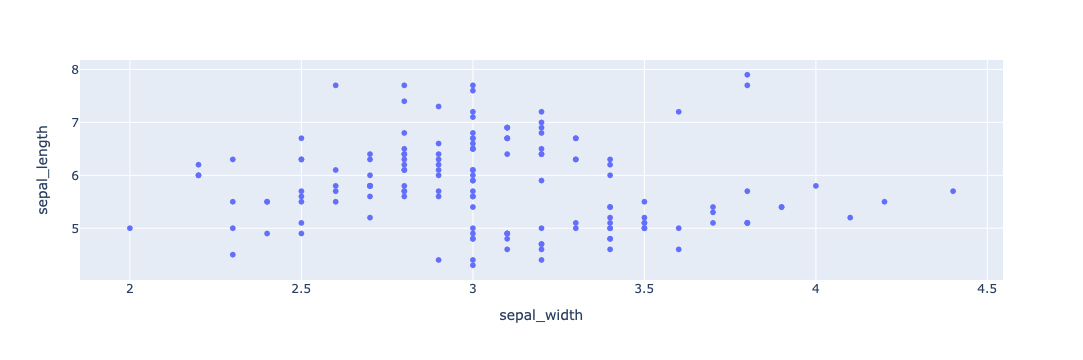

In [2]:
df = px.data.iris()

fig = px.scatter(df, x="sepal_width", y="sepal_length")
fig.show()

**Что представляет из себя объект fig?**

In [3]:
type(fig)

plotly.graph_objs._figure.Figure

In [4]:
' | '.join([i for i in fig])

'data | layout | frames'

**Объект fig состоит из:**
- data
- layout
- frames


In [5]:
fig.frames

()

In [6]:
fig.layout

Layout({
    'legend': {'tracegroupgap': 0},
    'margin': {'t': 60},
    'template': '...',
    'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'sepal_width'}},
    'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'sepal_length'}}
})

In [7]:
fig.data

(Scatter({
     'hovertemplate': 'sepal_width=%{x}<br>sepal_length=%{y}<extra></extra>',
     'legendgroup': '',
     'marker': {'color': '#636efa', 'symbol': 'circle'},
     'mode': 'markers',
     'name': '',
     'orientation': 'v',
     'showlegend': False,
     'x': array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. , 3. ,
                 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. , 3.4, 3.5,
                 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.1, 3. , 3.4, 3.5, 2.3,
                 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2, 3.1, 2.3, 2.8, 2.8,
                 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9, 3.1, 3. , 2.7, 2.2, 2.5,
                 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. , 2.9, 2.6, 2.4, 2.4, 2.7, 2.7,
                 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6, 3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9,
                 2.5, 2.8, 3.3, 2.7, 3. , 2.9, 3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7,
                 3. , 2.5, 2.8, 3.2, 3. , 

### Как можно настроить график? 

**Мы можем обновить:**
- update_annotations
- update_coloraxes
- update_geos
- update_layout (самое важное)
- update_layout_images
- update_legends
- update_mapboxes
- update_polars
- update_scenes
- update_selections
- update_shapes
- update_smiths
- update_ternaries
- update_traces (самое важное)
- update_xaxes
- update_yaxes

    !!! некоторые параметры можно задать ТОЛЬКО при создании графика

   sepal_length  sepal_width  petal_length  petal_width species  species_id
0           5.1          3.5           1.4          0.2  setosa           1


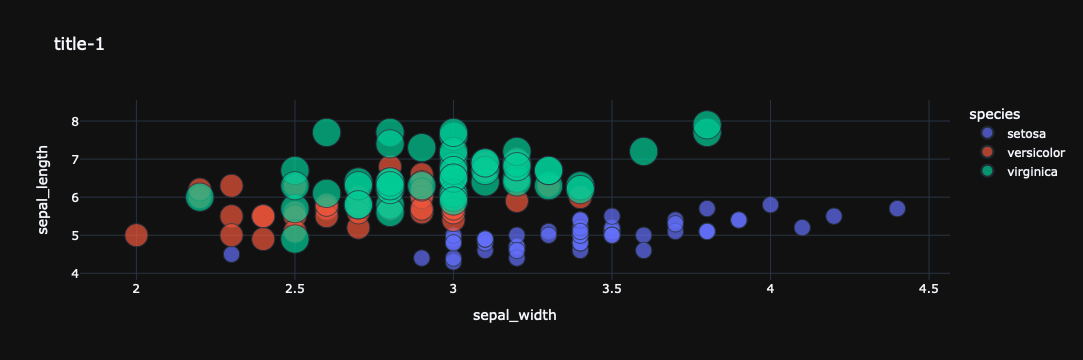

In [8]:
# Загрузка данных
df = px.data.iris()
print(df[:1])

# Создание графика
fig = px.scatter(
    df, 
    x="sepal_width", 
    y="sepal_length", 
    title="title-1",
    template="plotly_dark",
    hover_data=["petal_length", "petal_width"], # дополнительные 
    hover_name="species", # то, что отображается жирным в подсказке  
    color="species", # по какому столцу будут раскрашены точки  
    color_continuous_scale='Viridis', # в какие цвета будут раскрашены точки 
    size="species_id" # от значений в каком столбце будет зависеть размер точки 
)

fig.show()

Figure doesn't have frames


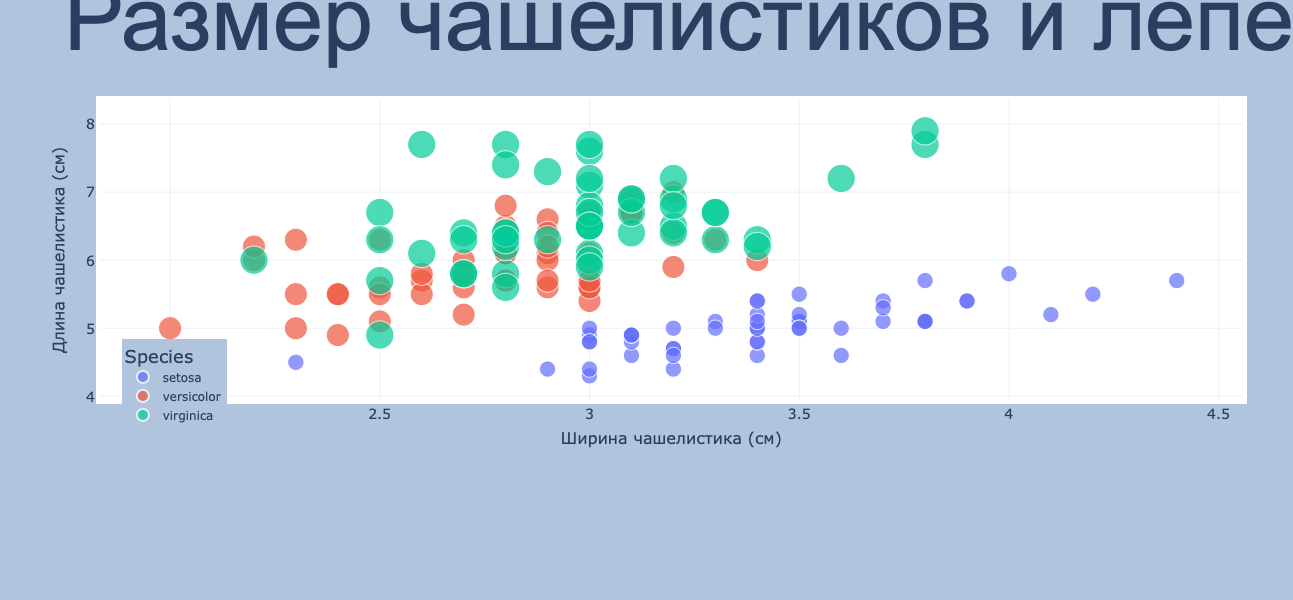

In [9]:
# Обновление графика с общими настройками через словарь
layout = {
    "title": "Размер чашелистиков и лепестков Iris", # Заголовок графика           -- переопределили 
    "title_font_size": 90, # Размер шрифта заголовка
    "title_font_family": "Arial", # Семейство шрифтов заголовка
    "xaxis_title": "Ширина чашелистика (см)", # Название оси X
    "yaxis_title": "Длина чашелистика (см)", # Название оси Y
    "xaxis_title_font_size": 16, # Размер шрифта названия оси X
    "yaxis_title_font_size": 16, # Размер шрифта названия оси Y
    "xaxis_tickfont_size": 14, # Размер шрифта делений оси X
    "yaxis_tickfont_size": 14, # Размер шрифта делений оси Y
    "legend_title": "Species", # Заголовок легенды
    "legend_title_font_size": 18, # Размер шрифта заголовка легенды
    "legend": {"x": 0.02, "y": -0.1}, # Позиция легенды
    "template": "plotly_white", # Шаблон стилей графика                            -- переопределили 
    "autosize": False, # Автоматическое изменение размера графика
    "width": 900, # Ширина графика в пикселях
    "height": 600, # Высота графика в пикселях
    "margin": dict(l=100, r=50, b=200, t=100, pad=4), # Мargins around the figure
    "paper_bgcolor": "LightSteelBlue", # Цвет фона 
    # "showlegend": False

}

fig.update_layout(**layout) # Применяем общие настройки к графику

if fig.frames: 
    print("Figure has frames")
else:
    print("Figure doesn't have frames")
    
# Отображение графика
fig.show() 

### Немного про update_traces 

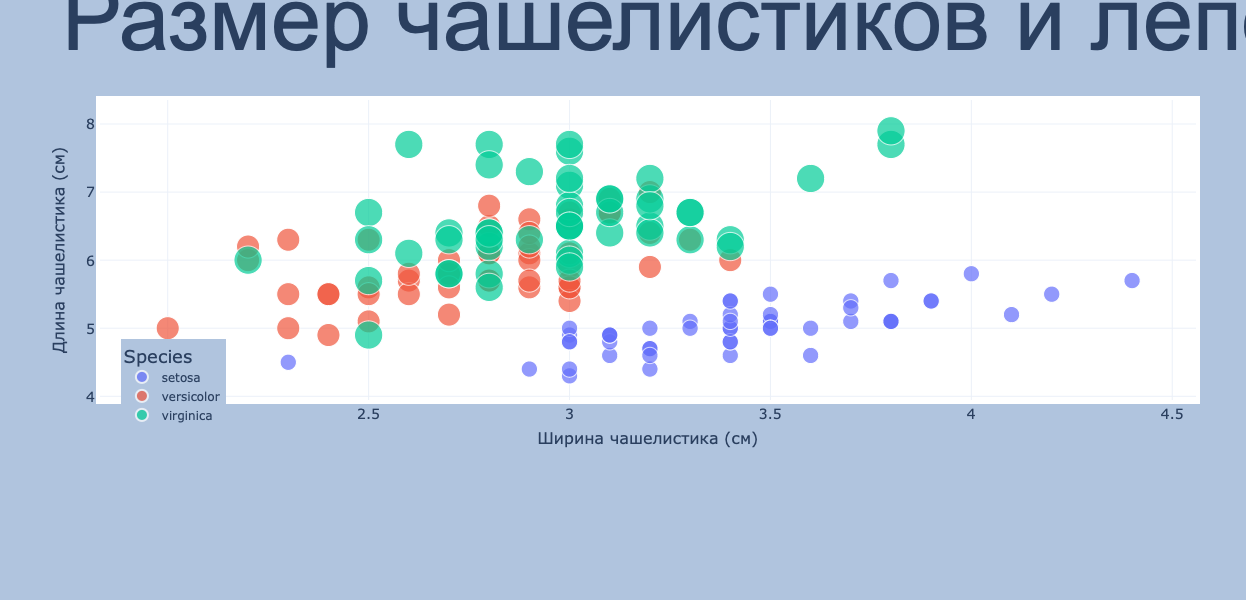

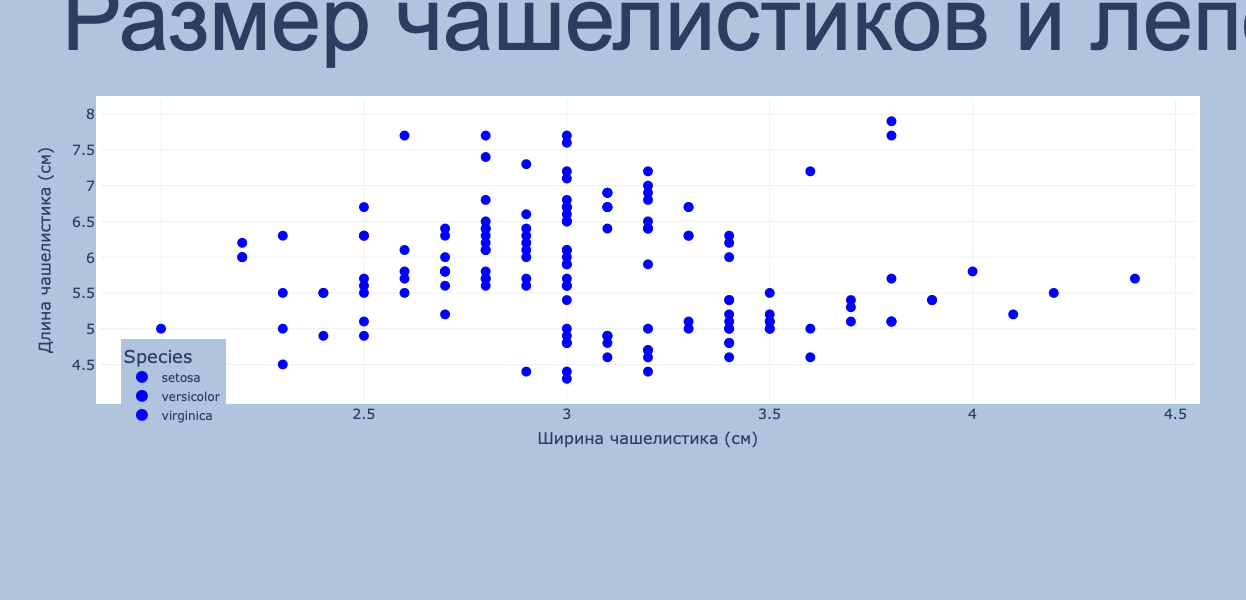

In [10]:
fig.update_traces(
    hovertemplate='Ширина: %{x} <br> Длина: %{y}'
)

fig.show()

# ---- 

fig.update_traces(
    marker=dict(
        color='blue', # Устанавливает цвет всех маркеров
        size=10, # Устанавливает размер всех маркеров равным N
        symbol='circle' # Изменяет форму маркеров на круглые / ромбики diamond
    ),
    line=dict(width=20), # Устанавливает ширину линий трасс равной N пикселям
    hovertemplate='<b>%{hovertext}</b><br>CUSTOM_Width: %{x}<br>CUSTOM_Length: %{y}', # Изменяет шаблон подсказки
)

fig.show()

### Анимация 

Figure has frames


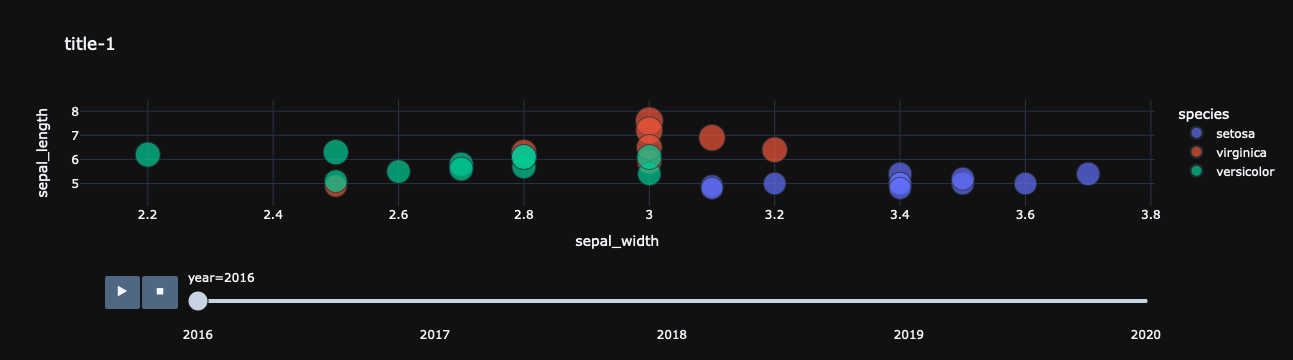

In [11]:
# Загрузка данных
df = px.data.iris()
df = df.sample(df.shape[0])
df['year'] = [2016] * 30 + [2017] * 30 + [2018] * 30 + [2019] * 30 + [2020] * 30 

# Создание графика с настройками ховера и маркеров
fig = px.scatter(
    df, 
    x="sepal_width", 
    y="sepal_length", 
    title="title-1",
    template="plotly_dark",
    hover_data=["petal_length", "petal_width", "species"], 
    hover_name="species", 
    color="species", 
    color_continuous_scale='Viridis', 
    size="sepal_length",
    animation_frame="year" # вот здесь лежит анимация 
)


if fig.frames: 
    print("Figure has frames")
else:
    print("Figure doesn't have frames")
    
# Отображение графика
fig.show() 

       country continent  year  lifeExp      pop   gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952   28.801  8425333  779.445314       AFG   

   iso_num  
0        4  
Figure has frames


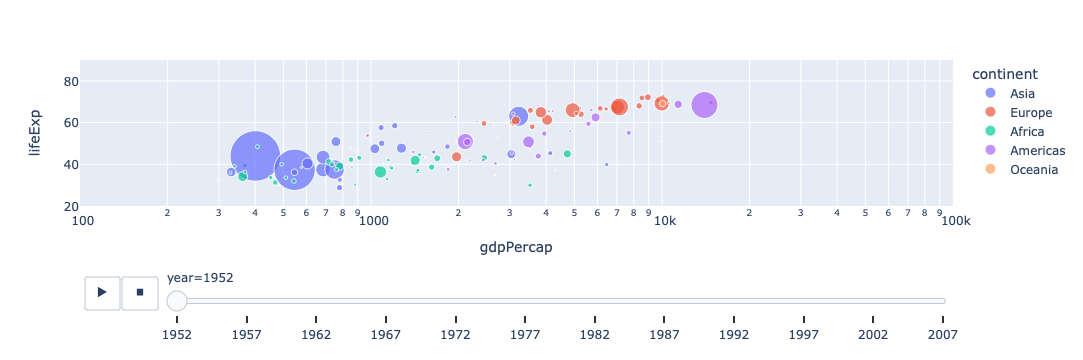

In [12]:
# Загрузка данных
df = px.data.gapminder()
print(df[:1])

# Создание анимированного графика
fig = px.scatter(
    df, 
    x="gdpPercap", 
    y="lifeExp", 
    animation_frame="year", # анимация 
    size="pop", 
    color="continent", 
    hover_name="country",
    log_x=True, 
    size_max=55, 
    range_x=[100, 100_000], 
    range_y=[20, 90]
)

if fig.frames: 
    print("Figure has frames")
else:
    print("Figure doesn't have frames")
    
# Отображение графика
fig.show()

### Через go - низкоуровневая настройка 

Метод **add_trace()** в Plotly используется для добавления новых трасс (traces) к фигуре. Трасс представляет собой набор данных, которые будут отображаться на графике. Это может быть линия, столбец, точка или любой другой вид данных, поддерживаемый Plotly. Метод принимает объект трассы (например, экземпляр go.Scatter или go.Bar) и добавляет его к фигуре. Этот метод позволяет начать с пустой фигуры и последовательно добавлять к ней трассы.


Также можно использовать специализированные методы для добавления определенных типов трасс, например, **add_scatter()** для добавления трасс типа scatter и **add_bar()** для добавления трасс типа bar:

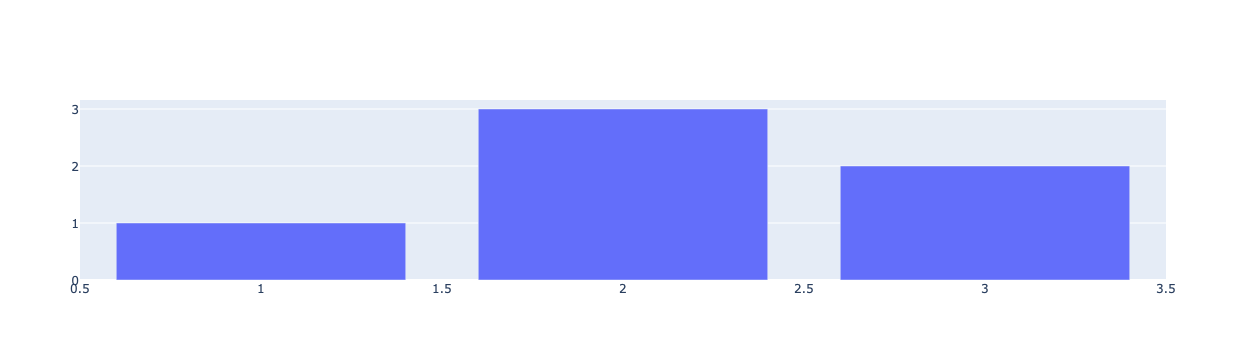

In [13]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(x=[1, 2, 3], y=[1, 3, 2]))
fig.show()

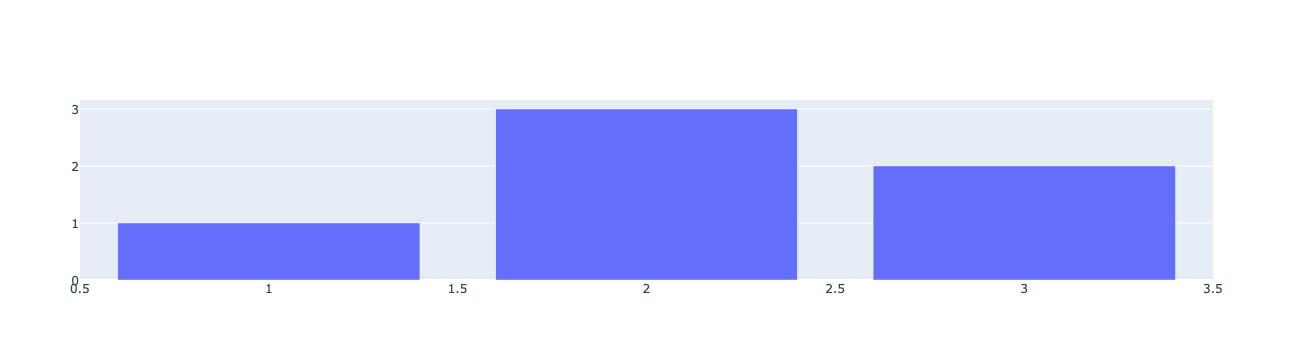

In [14]:
from plotly.subplots import make_subplots

fig = go.Figure()
fig.add_bar(x=[1, 2, 3], y=[1, 3, 2])
fig.show()

Разница между **add_trace** и **add_scatter** заключается в том, что add_trace является более универсальным методом, который позволяет добавлять различные типы трасс (наборов данных) к фигуре, включая, но не ограничиваясь, go.Scatter, go.Bar, go.Histogram и другими. В то время как add_scatter предназначен исключительно для добавления трасс типа go.Scatter.

**Что можно добавить?**
- add_annotation
- add_bar
- add_barpolar
- add_box
- add_candlestick
- add_carpet
- add_choropleth
- add_choroplethmapbox
- add_cone
- add_contour
- add_contourcarpet
- add_densitymapbox
- add_funnel
- add_funnelarea
- add_heatmap
- add_heatmapgl
- add_histogram
- add_histogram2d
- add_histogram2dcontour
- add_hline
- add_hrect
- add_icicle
- add_image
- add_indicator
- add_isosurface
- add_layout_image
- add_mesh3d
- add_ohlc
- add_parcats
- add_parcoords
- add_pie
- add_pointcloud
- add_sankey
- add_scatter
- add_scatter3d
- add_scattercarpet
- add_scattergeo
- add_scattergl
- add_scattermapbox
- add_scatterpolar
- add_scatterpolargl
- add_scattersmith
- add_scatterternary
- add_selection
- add_shape
- add_splom
- add_streamtube
- add_sunburst
- add_surface
- add_table
- add_treemap
- add_violin
- add_vline
- add_volume
- add_vrect
- add_waterfall

### Подграфики-1

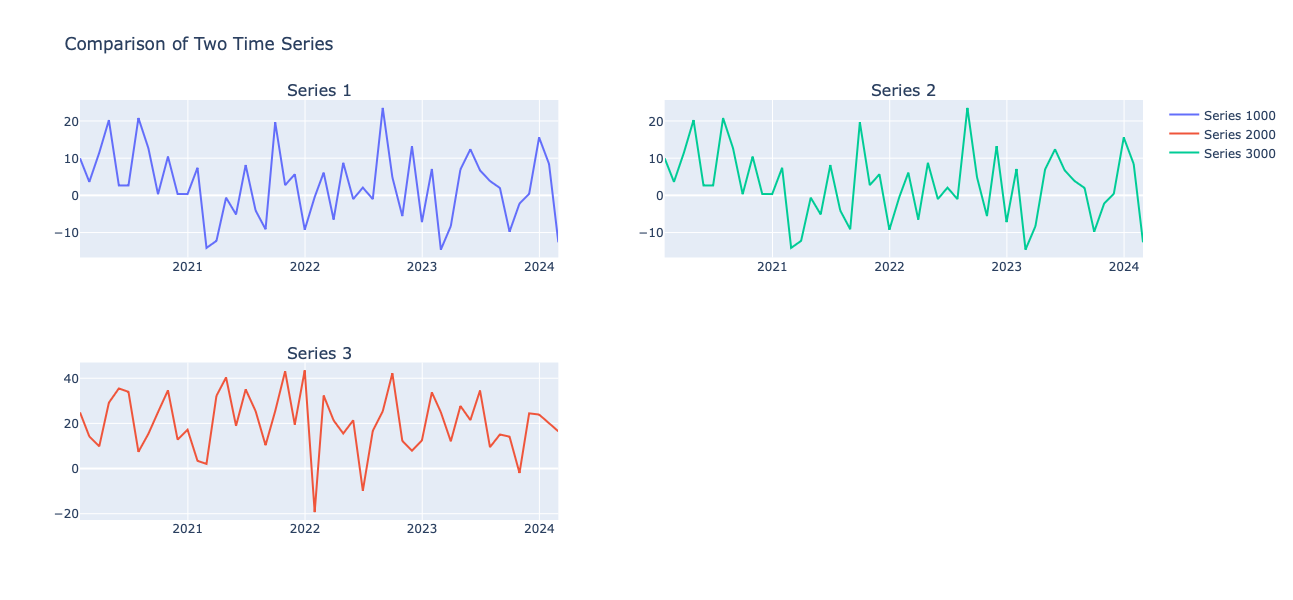

In [15]:
# Данные 
np.random.seed(42)  
dates = pd.date_range(start='2020-01-01', periods=50, freq='ME')
series1 = np.random.randn(len(dates)) * 10 + 5
series2 = np.random.randn(len(dates)) * 15 + 20

# Создание подграфиков
fig = make_subplots(rows=2, cols=2, subplot_titles=("Series 1", "Series 2", "Series 3"))

# Добавление графиков
fig.add_trace(go.Scatter(x=dates, y=series1, name="Series 1000"), row=1, col=1)
fig.add_trace(go.Scatter(x=dates, y=series2, name="Series 2000"), row=2, col=1)
fig.add_trace(go.Scatter(x=dates, y=series1, name="Series 3000"), row=1, col=2)

# Настройка общих параметров графика
fig.update_layout(height=600, width=1000, title_text="Comparison of Two Time Series")

# Отображение графика
fig.show()


    То же самое через set_subplots (make_subplots = Figure + set_subplots)

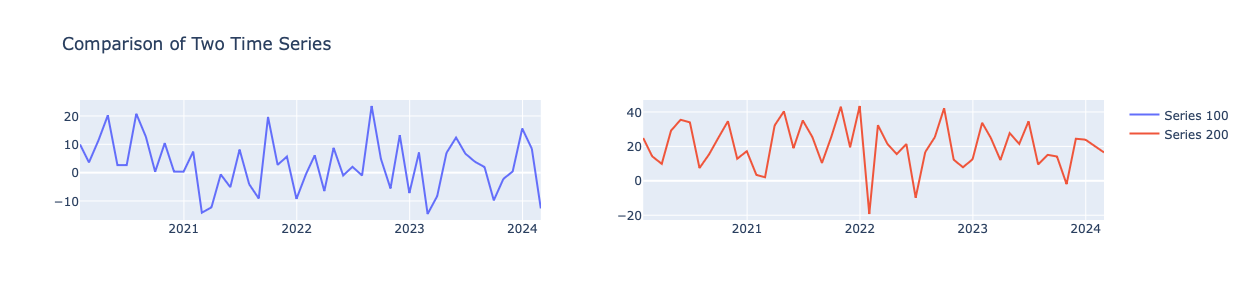

In [16]:
fig = go.Figure()

fig.set_subplots(rows=1, cols=2)

fig.add_trace(go.Scatter(x=dates, y=series1, name="Series 100"), row=1, col=1)
fig.add_trace(go.Scatter(x=dates, y=series2, name="Series 200"), row=1, col=2)

# Настройка общих параметров графика
fig.update_layout(height=300, width=1000, title_text="Comparison of Two Time Series")

# Отображение графика
fig.show()


    Пример с подграфиками + domain

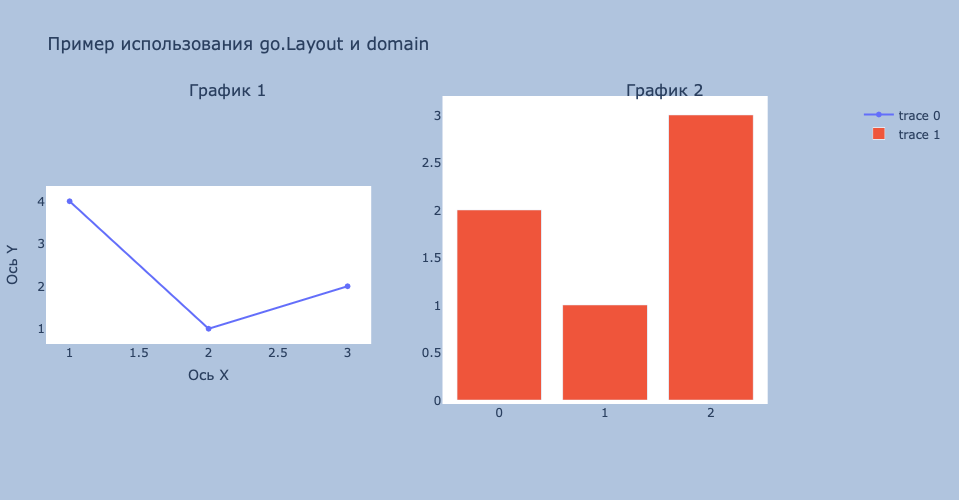

In [17]:
# Создание подграфиков
fig = make_subplots(rows=1, cols=2, subplot_titles=("График 1", "График 2"))

# Добавление данных для первого графика (scatter)
fig.add_trace(go.Scatter(x=[1, 2, 3], y=[4, 1, 2], mode='markers+lines'), row=1, col=1)

# Добавление данных для второго графика (bar)
fig.add_trace(go.Bar(y=[2, 1, 3]), row=1, col=2)

# Настройка общего стиля графика
fig.update_layout(
    title='Пример использования go.Layout и domain',
    xaxis_title='Ось X',
    yaxis_title='Ось Y',
    autosize=False,
    width=1000,
    height=500,
    margin=dict(l=50, r=50, b=100, t=100, pad=4),
    paper_bgcolor="LightSteelBlue",
    plot_bgcolor="white"
)

# Установка домена для каждого подграфика
fig.update_xaxes(domain=[0, 0.4], row=1, col=1)
fig.update_yaxes(domain=[0.2, 0.7], row=1, col=1)
fig.update_xaxes(domain=[0.5, 0.9], row=1, col=2)
fig.update_yaxes(domain=[0, 1], row=1, col=2)

# Отображение графика
fig.show()

### For each

In [ ]:
# продолжение примера выше 

def change_color(trace):
    trace.marker.color = 'rgb(255, 165, 0)'  # Задаем новый цвет
    return trace

fig.for_each_trace(change_color)

# Отображение графика
fig.show()

### Сохрание графика 

Основное отличие заключается в том, что **write_html** записывает HTML прямо в файл на диске, в то время как **to_html** возвращает HTML-код как строку, которую вы можете затем использовать в своем коде Python. Выбор между этими методами зависит от того, как вы планируете использовать HTML-код графика: сохранение в файл или вставка в существующий документ.

In [19]:
fig.write_html('my_figure1.html')

In [20]:
fig.to_html()[:1000]

'<html>\n<head><meta charset="utf-8" /></head>\n<body>\n    <div>                        <script type="text/javascript">window.PlotlyConfig = {MathJaxConfig: \'local\'};</script>\n        <script type="text/javascript">/**\n* plotly.js v2.30.0\n* Copyright 2012-2024, Plotly, Inc.\n* All rights reserved.\n* Licensed under the MIT license\n*/\n/*! For license information please see plotly.min.js.LICENSE.txt */\n!function(t,e){"object"==typeof exports&&"object"==typeof module?module.exports=e():"function"==typeof define&&define.amd?define([],e):"object"==typeof exports?exports.Plotly=e():t.Plotly=e()}(self,(function(){return function(){var t={79288:function(t,e,r){"use strict";var n=r(3400),i={"X,X div":\'direction:ltr;font-family:"Open Sans",verdana,arial,sans-serif;margin:0;padding:0;\',"X input,X button":\'font-family:"Open Sans",verdana,arial,sans-serif;\',"X input:focus,X button:focus":"outline:none;","X a":"text-decoration:none;","X a:hover":"text-decoration:none;","X .crisp":"shape

### Plotly + Matplotlib 

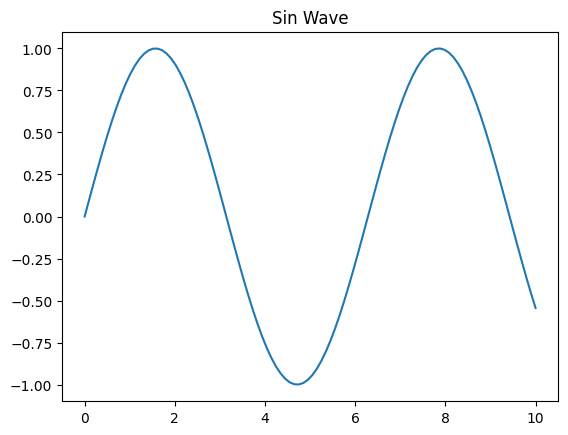

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Генерация данных
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Построение графика
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Sin Wave')
plt.savefig('sin_wave.png')  # Экспорт графика в файл

In [ ]:
import plotly.graph_objects as go
from PIL import Image
import matplotlib.pyplot as plt

# Загрузка изображения графика
img = Image.open('sin_wave.png')

# Преобразование изображения в массив numpy для дальнейшей работы с Matplotlib
img_array = np.array(img)

# Отображение изображения с помощью Matplotlib для проверки его качества
plt.imshow(img_array)
plt.title('Original Image')
plt.show()

# Создание интерактивного графика с использованием изображения
fig = go.Figure(data=go.Image(z=img_array))

# Обновление макета графика для автоматического изменения размера и добавление заголовка
fig.update_layout(
    title='Interactive Sin Wave', 
    autosize=False,
    width=1000,
    height=800,
)

# Отображение графика
fig.show()
